# VANISHING GRADIENT PROBLEM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

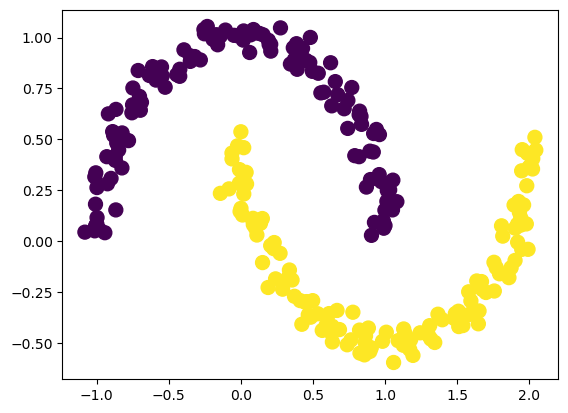

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [4]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
old_weights = model.get_weights()[0]

In [7]:
old_weights

array([[-0.08856571, -0.16512054, -0.54472256, -0.5325568 , -0.6742486 ,
         0.2762606 ,  0.39253503,  0.19033414,  0.58763546,  0.19191146],
       [-0.4744491 ,  0.6389145 , -0.3815033 , -0.60230035, -0.63188136,
         0.12763298,  0.30510098,  0.21207857,  0.69082314,  0.41141766]],
      dtype=float32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5000 - loss: 0.6997
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4825 - loss: 0.6996 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4538 - loss: 0.7003 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4618 - loss: 0.6944 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6042 - loss: 0.6906 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5044 - loss: 0.6915 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5339 - loss: 0.6904 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5018 - loss: 0.6905 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5073 - loss: 0.6900 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4970 - loss: 0.6910 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4834 - loss: 0.6924 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4752 - loss: 0.6919 
Ep

In [10]:
new_weights = model.get_weights()[0]

In [11]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [12]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [13]:
gradient

array([[  504.62326,   576.5128 ,   503.30493,  -836.0108 ,   560.97003,
         -660.45624,  -565.2761 ,   679.511  ,  -557.46484,  -607.1988 ],
       [ -798.3203 , -1032.0441 ,  -953.81433,  1171.0426 , -1065.8491 ,
         1217.7903 ,  1052.4012 , -1068.9384 ,  1015.86835,  1027.3248 ]],
      dtype=float32)

In [14]:
percent_change

array([[569.77277 , 349.14667 ,  92.396576, 156.9806  ,  83.199295,
        239.06999 , 144.00655 , 357.00952 ,  94.86577 , 316.3953  ],
       [168.2626  , 161.53087 , 250.01471 , 194.42836 , 168.67868 ,
        954.1346  , 344.9354  , 504.02942 , 147.05188 , 249.70364 ]],
      dtype=float32)

In [15]:
old_weights

array([[-0.08856571, -0.16512054, -0.54472256, -0.5325568 , -0.6742486 ,
         0.2762606 ,  0.39253503,  0.19033414,  0.58763546,  0.19191146],
       [-0.4744491 ,  0.6389145 , -0.3815033 , -0.60230035, -0.63188136,
         0.12763298,  0.30510098,  0.21207857,  0.69082314,  0.41141766]],
      dtype=float32)

In [16]:
new_weights

array([[-0.593189  , -0.7416334 , -1.0480275 ,  0.30345404, -1.2352186 ,
         0.93671685,  0.9578112 , -0.48917687,  1.1451004 ,  0.7991103 ],
       [ 0.32387125,  1.6709588 ,  0.57231104, -1.7733431 ,  0.43396786,
        -1.0901574 , -0.7473003 ,  1.281017  , -0.32504523, -0.6159073 ]],
      dtype=float32)

## USING RELU

In [17]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
old_weights = model.get_weights()[0]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5002 - loss: 0.6946
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6030 - loss: 0.6904 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4989 - loss: 0.6842 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5022 - loss: 0.6744 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5165 - loss: 0.6575 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5843 - loss: 0.6370 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7832 - loss: 0.6133 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8079 - loss: 0.5814 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7944 - loss: 0.5770 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8204 - loss: 0.5360 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8485 - loss: 0.5082 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8640 - loss

In [22]:
new_weights = model.get_weights()[0]

In [23]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [24]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [25]:
gradient, percent_change

(array([[  -4.6949086,  103.41054  ,   31.535385 , -117.79156  ,
          -73.7234   ,   66.77903  ,  135.9597   ,   40.58903  ,
           98.82965  ,   -7.2038765],
        [  69.7962   ,  -75.756714 ,   82.79654  ,   -3.1945405,
          236.67236  ,  235.25362  ,  -91.03228  ,  -60.84287  ,
           49.581738 ,   61.470566 ]], dtype=float32),
 array([[1.3263820e+00, 2.3360922e+01, 5.0295057e+00, 1.1082076e+02,
         5.1523403e+01, 6.5188469e+01, 8.5716553e+01, 7.4909887e+00,
         2.1253719e+01, 1.1530321e+00],
        [1.0451749e+01, 4.9872658e+01, 1.9591730e+01, 7.0700783e-01,
         7.9114265e+01, 3.5949268e+01, 2.4107468e+02, 1.9299480e+01,
         8.2242682e+02, 1.2229181e+01]], dtype=float32))

In [26]:
old_weights, new_weights

(array([[ 0.35396355, -0.44266462,  0.62700766,  0.10629016, -0.14308721,
          0.10243994, -0.15861547, -0.54183817,  0.46499938,  0.6247768 ],
        [-0.6677945 ,  0.15190029, -0.42260966,  0.4518395 , -0.29915258,
         -0.6544045 ,  0.03776103,  0.31525654, -0.00602871, -0.5026548 ]],
       dtype=float32),
 array([[ 0.35865846, -0.54607517,  0.5954723 ,  0.22408172, -0.06936381,
          0.0356609 , -0.29457518, -0.5824272 ,  0.36616972,  0.63198066],
        [-0.73759073,  0.227657  , -0.5054062 ,  0.45503405, -0.53582495,
         -0.88965815,  0.12879331,  0.3760994 , -0.05561045, -0.56412536]],
       dtype=float32))

# EARLY STOPPING 

In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [28]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

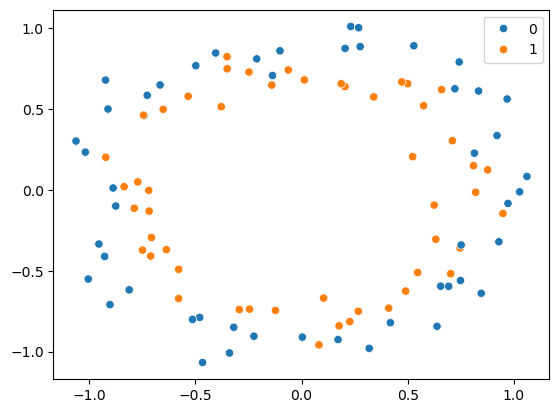

In [29]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [31]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1300, verbose=0)

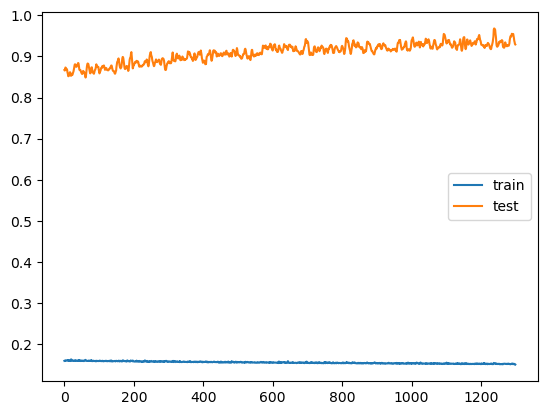

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


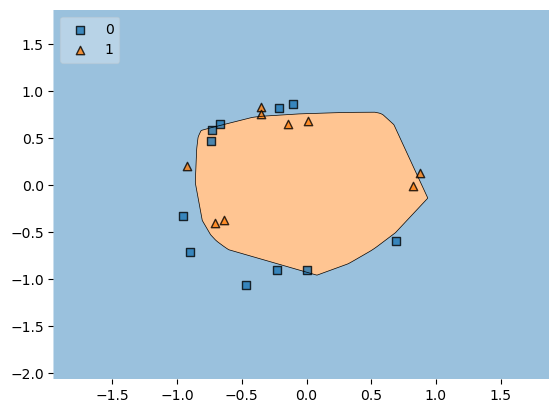

In [36]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## NOW IMPLEMENTING EARLY STOPPING

In [37]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5688 - loss: 0.6759 - val_accuracy: 0.3500 - val_loss: 0.7252
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6016 - loss: 0.6713 - val_accuracy: 0.3500 - val_loss: 0.7256
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5859 - loss: 0.6733 - val_accuracy: 0.3500 - val_loss: 0.7246
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5508 - loss: 0.6767 - val_accuracy: 0.3500 - val_loss: 0.7229
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5844 - loss: 0.6766 - val_accuracy: 0.3500 - val_loss: 0.7216
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5961 - loss: 0.6712 - val_accuracy: 0.3500 - val_loss: 0.7210
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6195 - loss: 0.6680 - val_accuracy: 0.3500 - val_loss: 0.7201
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5375 - loss: 0.6785 - val_accuracy: 0.3500 - v

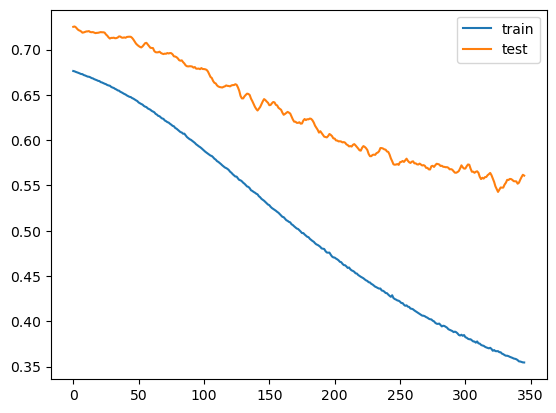

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


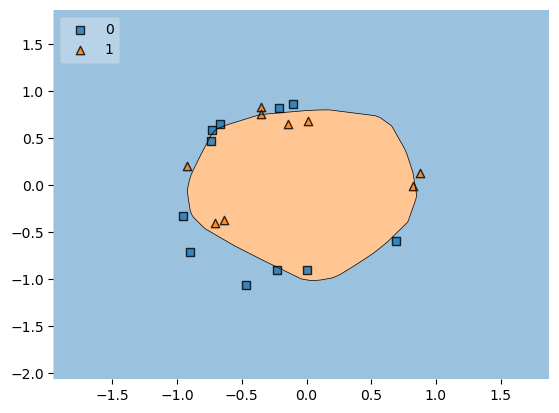

In [44]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# FEATURE SCALING

In [45]:
import numpy as np
import pandas as pd

In [50]:
df=pd.read_csv('Social_Network_Ads.csv')

In [51]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

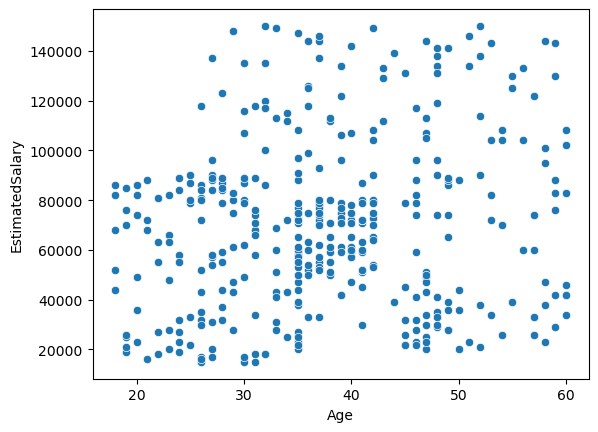

In [53]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [54]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [57]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6295 - loss: 9214.3477 - val_accuracy: 0.6000 - val_loss: 6217.6455
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6543 - loss: 4425.5928 - val_accuracy: 0.6000 - val_loss: 2373.2102
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6200 - loss: 1207.9661 - val_accuracy: 0.4000 - val_loss: 781.2059
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3786 - loss: 656.7099 - val_accuracy: 0.6000 - val_loss: 335.3702
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6602 - loss: 224.9626 - val_accuracy: 0.4000 - val_loss: 92.6227
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5475 - loss: 73.3100 - val_accuracy: 0.4000 - val_loss: 139.1764
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4690 - loss: 120.1107 - val_accuracy: 0.4000 - val_loss: 34.2872
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4724 - l

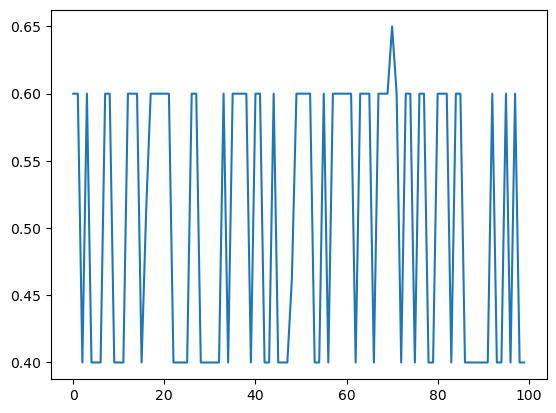

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

### APPLY SCALING

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

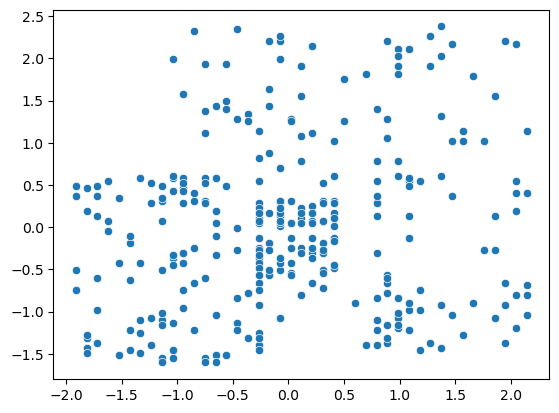

In [64]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [65]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6720 - loss: 0.6774 - val_accuracy: 0.7625 - val_loss: 0.6273
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7770 - loss: 0.6210 - val_accuracy: 0.7625 - val_loss: 0.5699
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7984 - loss: 0.5635 - val_accuracy: 0.8000 - val_loss: 0.5215
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8197 - loss: 0.5277 - val_accuracy: 0.7875 - val_loss: 0.4820
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8332 - loss: 0.4818 - val_accuracy: 0.7875 - val_loss: 0.4493
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8431 - loss: 0.4498 - val_accuracy: 0.8000 - val_loss: 0.4217
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7999 - loss: 0.4525 - val_accuracy: 0.8125 - val_loss: 0.3988
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8622 - loss: 0.4052 - val_accuracy: 0.8250 - val_l

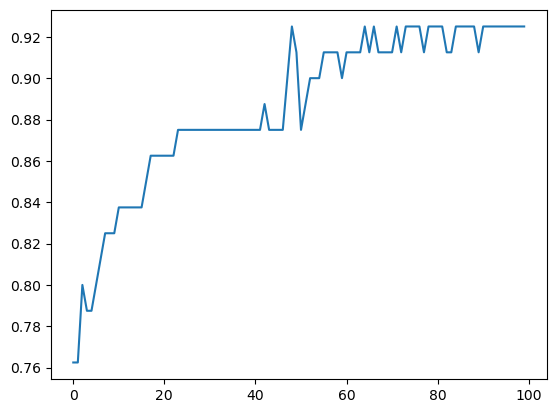

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## DROPOUT IMPLEMENTATION  

In [67]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### GENERATE DATA

In [68]:
X_train = np.linspace(-1, 1, 20)

In [69]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [70]:
X_test = np.linspace(-1, 1, 20)

In [71]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                    -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                    0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                    0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

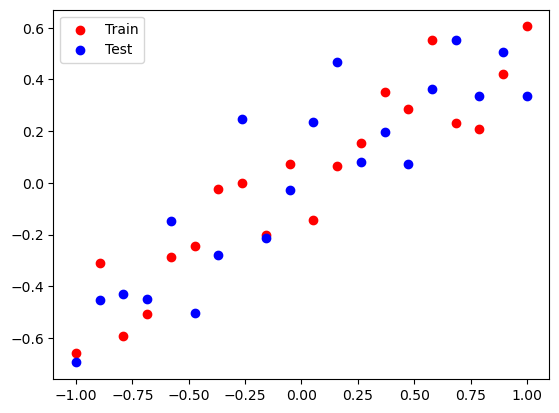

In [72]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

## REGRESSION MODEL

In [73]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

In [74]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.003656211541965604, Test: 0.044419653713703156


In [75]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


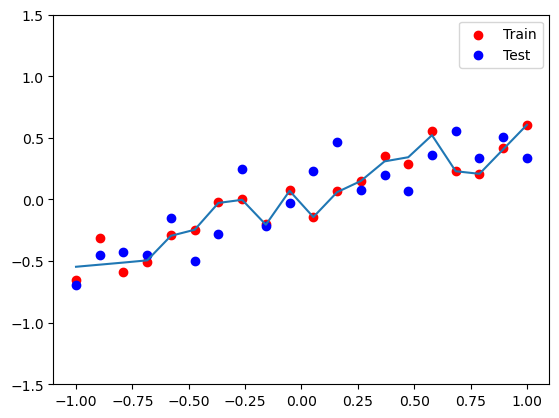

In [76]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

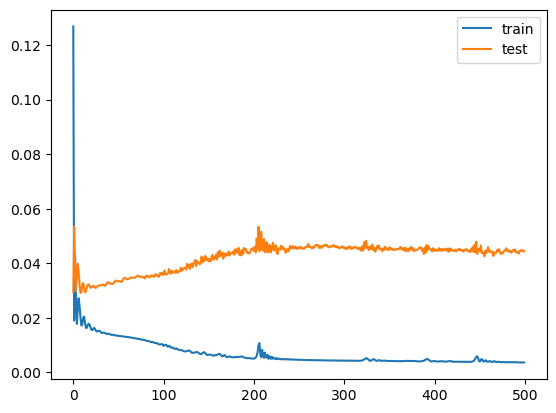

In [77]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## DROPOUT MODEL

In [86]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                                validation_data = (X_test, y_test),
                                verbose=False)

In [87]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011123282834887505, Test: 0.03998752310872078


In [88]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


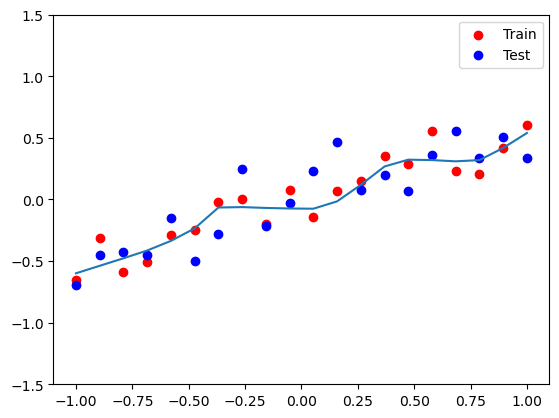

In [89]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# CLASSIFICATION PROBLEM

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
X = np.array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-01, -3.30409e-01],
        [-2.18894e-01, -4.23977e-01],
        [-8.06452e-02, -5.64327e-01],
        [ 6.68203e-02, -5.17544e-01],
        [ 9.44700e-02, -3.24561e-01],
        [ 1.86636e-01, -1.66667e-01],
        [ 6.22120e-02, -7.30994e-02],
        [ 2.07373e-02, -1.95906e-01],
        [ 2.99539e-02, -3.42105e-01],
        [-9.90783e-02, -3.77193e-01],
        [-6.91244e-03, -4.64912e-01],
        [ 1.31336e-01, -4.29825e-01],
        [ 2.32719e-01, -1.95906e-01],
        [ 8.52535e-02, -8.47953e-02],
        [-1.31336e-01, -2.36842e-01],
        [ 2.30415e-03, -1.25731e-01],
        [ 1.22120e-01, -2.92398e-03],
        [-3.47926e-01, -3.12865e-01],
        [-2.28111e-01, -1.25731e-01],
        [-7.60369e-02,  1.46199e-02],
        [ 4.37788e-02,  2.04678e-02],
        [ 1.15207e-02,  1.54971e-01],
        [-4.17051e-01, -1.60819e-01],
        [-3.15668e-01, -3.18713e-01],
        [     1.26728e-01, -2.19298e-01],
        [ 2.05069e-01, -3.12865e-01],
        [ 2.18894e-01, -4.59064e-01],
        [ 7.14286e-02, -6.46199e-01],
        [-1.31336e-01, -6.05263e-01],
        [-2.09677e-01, -5.81871e-01],
        [-2.28111e-01, -4.29825e-01],
        [-1.45161e-01, -4.12281e-01],
        [-6.68203e-02, -4.82456e-01],
        [ 1.35945e-01, -5.11696e-01],
        [ 2.69585e-01, -4.06433e-01],
        [ 2.97235e-01, -2.95322e-01],
        [ 2.74194e-01, -1.72515e-01],
        [ 2.55760e-01, -4.97076e-02],
        [ 2.23502e-01, -4.97076e-02],
        [ 1.82028e-01, -8.47953e-02],
        [ 1.58986e-01, -1.54971e-01],
        [ 7.14286e-02, -2.13450e-01],
        [ 1.61290e-02, -2.66082e-01],
        [-2.53456e-02, -3.83041e-01],
        [-1.15207e-02, -4.82456e-01],
        [-2.30415e-03, -5.05848e-01],
        [ 2.53456e-02, -5.11696e-01],
        [ 2.53456e-02, -5.58480e-01],
        [ 1.15207e-02, -6.57895e-01],
        [-4.83871e-02, -6.46199e-01],
        [-8.52535e-02, -5.52632e-01],
        [-9.90783e-02, -5.00000e-01],
        [-1.61290e-02, -4.23977e-01],
        [ 1.31336e-01, -3.59649e-01],
        [ 2.23502e-01, -3.71345e-01],
        [ 2.92627e-01, -3.01170e-01],
        [ 2.60369e-01, -2.07602e-01],
        [ 2.00461e-01, -2.25146e-01],
        [ 1.72811e-01, -2.71930e-01],
        [-1.31336e-01,  9.06433e-02],
        [-1.49770e-01,  7.30994e-02],
        [-2.41935e-01,  6.14035e-02],
        [-3.01843e-01,  1.78363e-01],
        [-2.97235e-01,  1.95906e-01],
        [-2.74194e-01,  3.07018e-01],
        [-3.24885e-01,  2.95322e-01],
        [-3.98618e-01,  2.66082e-01],
        [-4.35484e-01,  1.60819e-01],
        [-4.72350e-01,  7.89474e-02],
        [-3.38710e-01,  4.38596e-02],
        [-2.69585e-01,  4.38596e-02],
        [-2.55760e-01,  1.02339e-01],
        [-1.68203e-01,  2.66082e-01],
        [-1.12903e-01,  3.01170e-01],
        [-3.91705e-02,  3.47953e-01],
        [-1.26728e-01,  4.41520e-01],
        [-2.32719e-01,  4.41520e-01],
        [-3.38710e-01,  4.18129e-01],
        [-4.12442e-01,  3.53801e-01],
        [-5.09217e-01,  2.19298e-01],
        [-5.41475e-01,  1.46199e-02],
        [-5.04608e-01, -1.25731e-01],
        [-4.90783e-01, -1.43275e-01],
        [-3.61751e-01, -1.37427e-01],
        [-2.69585e-01, -8.47953e-02],
        [-2.23502e-01, -7.89474e-02],
        [-1.86636e-01, -3.80117e-02],
        [-1.54378e-01, -8.77193e-03],
        [-1.12903e-01,  5.55556e-02],
        [-8.52535e-02,  1.37427e-01],
        [-8.52535e-02,  2.77778e-01],
        [-1.68203e-01,  3.01170e-01],
        [-1.91244e-01,  1.95906e-01],
        [-1.40553e-01, -4.97076e-02],
        [-2.99539e-02,  6.72515e-02],
        [-2.00461e-01, -2.30994e-01],
        [-1.08295e-01, -8.47953e-02],
        [ 3.45622e-02,  6.72515e-02],
        [ 8.06452e-02,  1.19883e-01],
        [-3.85369e-01,  3.30409e-02],
        [-3.81221e-01,  1.31287e-01],
        [-3.52189e-01,  2.58187e-01],
        [-3.54263e-01,  3.64620e-01],
        [-4.14401e-01, -6.92982e-02],
        [-4.99424e-01, -3.24561e-02],
        [-2.98272e-01, -9.79532e-02],
        [-3.16935e-01, -1.83918e-01],
        [-3.68779e-01, -2.90351e-01],
        [-3.56336e-01, -3.96784e-01],
        [-2.71313e-01,  4.38596e-03],
        [-1.77995e-01,  8.62573e-02],
        [-2.46429e-01,  1.43567e-01],
        [-2.50576e-01,  2.29532e-01],
        [-2.21544e-01,  3.76901e-01],
        [-2.15323e-01,  2.95029e-01],
        [-1.30300e-01,  2.17251e-01],
        [-2.07028e-01,  2.89474e-02],
        [-9.71198e-02,  2.13158e-01],
        [-3.90553e-02,  2.58187e-01],
        [ 1.90092e-02,  4.01462e-01],
        [-3.69816e-02,  4.21930e-01],
        [-6.39401e-02,  3.31871e-01],
        [-1.30300e-01,  3.76901e-01],
        [-3.75000e-01, -4.37719e-01],
        [-3.95737e-01, -3.51754e-01],
        [-3.54263e-01, -2.08480e-01],
        [-4.37212e-01, -3.76316e-01],
        [-4.80760e-01, -5.03216e-01],
        [-4.10253e-01, -4.66374e-01],
        [-2.48502e-01, -2.57602e-01],
        [-2.27765e-01, -3.14912e-01],
        [-2.83756e-01, -3.84503e-01],
        [-2.92051e-01, -4.54094e-01],
        [-3.37673e-01, -5.19591e-01],
        [-2.77535e-01, -5.48246e-01],
        [-2.07028e-01, -5.35965e-01],
        [-1.86290e-01, -4.78655e-01],
        [-1.32373e-01, -5.07310e-01],
        [-1.77995e-01, -2.98538e-01],
        [-1.65553e-01, -1.75731e-01],
        [-1.61406e-01, -1.26608e-01],
        [ 3.45622e-04,  2.58187e-01],
        [ 7.91475e-02,  3.56433e-01],
        [-2.66129e-02,  1.80409e-01],
        [-5.35714e-02,  7.80702e-02],
        [-1.41705e-02, -5.29240e-02],
        [-7.01613e-02, -1.63450e-01],
        [-6.39401e-02, -2.94444e-01],
        [-3.07604e-02, -4.66374e-01],
        [-5.77189e-02, -5.27778e-01],
        [-5.35714e-02, -3.96784e-01],
        [ 5.21889e-02, -4.17251e-01],
        [-1.62442e-02, -1.67544e-01],
        [-6.39401e-02, -8.56725e-02],
        [-6.18664e-02, -1.60819e-02],
        [-3.80184e-03,  4.38596e-03],
        [ 4.18203e-02,  2.04971e-01],
        [ 7.91475e-02,  1.92690e-01],
        [ 4.59677e-02,  2.54094e-01],
        [ 1.18548e-01,  1.92690e-01],
        [ 1.10253e-01,  8.62573e-02],
        [ 1.08180e-01, -6.92982e-02],
        [ 1.66244e-01, -2.42690e-02],
        [ 1.41359e-01,  6.57895e-02],
        [ 1.43433e-01,  1.68129e-01],
        [ 1.70392e-01,  1.92690e-01],
        [ 1.08180e-01,  2.99123e-01],
        [ 1.18548e-01,  3.19591e-01],
        [ 1.26843e-01,  3.93275e-01],
        [-8.67512e-02,  4.21930e-01],
        [-4.73502e-02,  5.07895e-01],
        [ 2.52304e-02,  5.20175e-01],
        [ 6.25576e-02,  5.52924e-01],
        [-5.87558e-03,  4.42398e-01],
        [-5.14977e-02,  5.73392e-01],
        [-8.05300e-02,  5.07895e-01],
        [-1.53111e-01,  5.52924e-01],
        [-1.11636e-01,  5.48830e-01],
        [-1.63479e-01,  4.91520e-01],
        [-2.52650e-01, -1.88012e-01],
        [-2.46429e-01, -3.65497e-02],
        [-3.21083e-01, -4.33626e-01],
        [-3.31452e-01, -6.05556e-01],
        [-3.85369e-01, -5.15497e-01],
        [-3.99885e-01, -6.21930e-01],
        [-1.24078e-01, -1.26608e-01],
        [-3.16935e-01, -2.28947e-01],
        [-2.94124e-01, -1.34795e-01],
        [-1.53111e-01,  1.84503e-01]])

In [101]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,     0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 0., 0.])

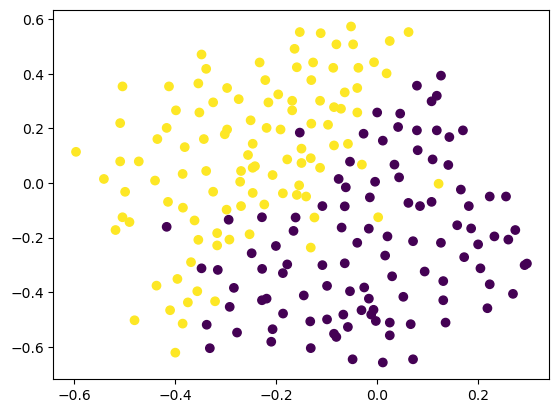

In [93]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [95]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500


c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7504 - loss: 0.6111 - val_accuracy: 0.5581 - val_loss: 0.7770
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8670 - loss: 0.2832 - val_accuracy: 0.6977 - val_loss: 0.7220
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8932 - loss: 0.2753 - val_accuracy: 0.8140 - val_loss: 0.4725
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8778 - loss: 0.2797 - val_accuracy: 0.8140 - val_loss: 0.3765
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8927 - loss: 0.3256 - val_accuracy: 0.8837 - val_loss: 0.3434
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8990 - loss: 0.2963 - val_accuracy: 0.7442 - val_loss: 0.4615
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9317 - loss: 0.1787 - val_accuracy: 0.8140 - val_loss: 0.4735
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9198 - loss: 0.2131 - val_accuracy: 0.8372 - val_loss: 0.3868
Epoc

In [96]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 986us/step


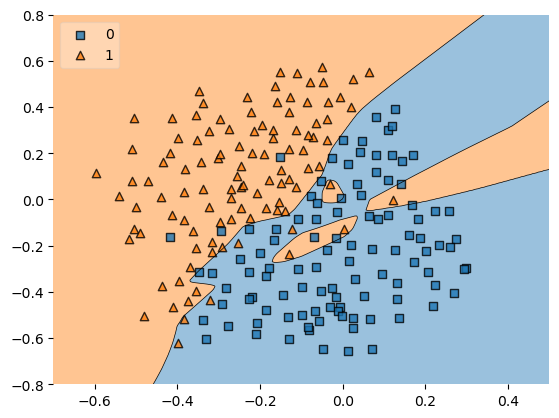

In [97]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

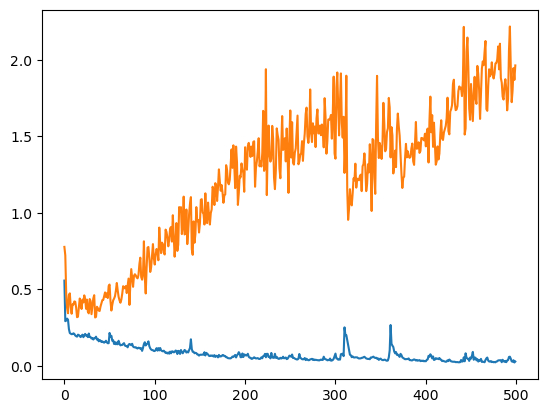

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

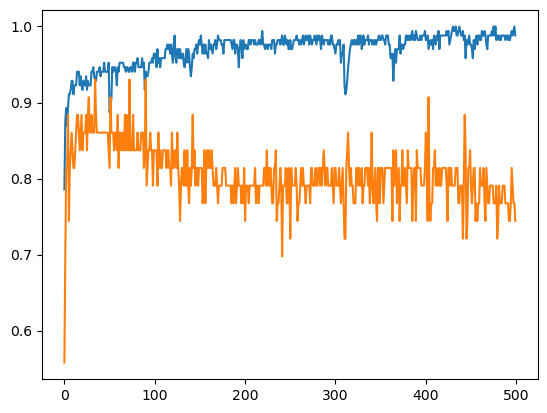

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## DROPOUT MODEL

In [102]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8055 - loss: 0.6101 - val_accuracy: 0.5814 - val_loss: 0.6610
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8611 - loss: 0.3183 - val_accuracy: 0.6977 - val_loss: 0.7013
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8791 - loss: 0.2595 - val_accuracy: 0.7442 - val_loss: 0.4787
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8808 - loss: 0.2417 - val_accuracy: 0.8372 - val_loss: 0.3720
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9164 - loss: 0.1759 - val_accuracy: 0.8605 - val_loss: 0.3774
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8653 - loss: 0.2570 - val_accuracy: 0.8605 - val_loss: 0.3705
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8607 - loss: 0.3528 - val_accuracy: 0.8605 - val_loss: 0.3518
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8986 - loss: 0.2220 - val_accuracy: 0.8605 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


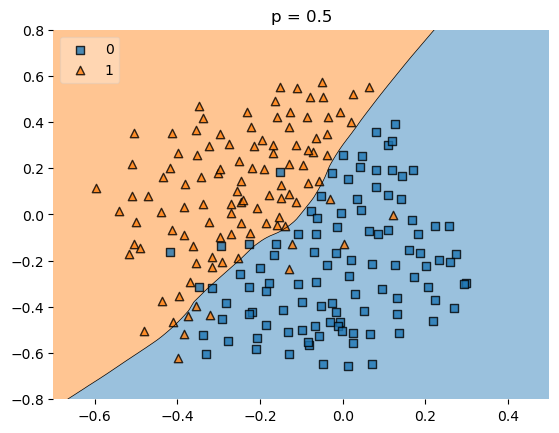

In [103]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

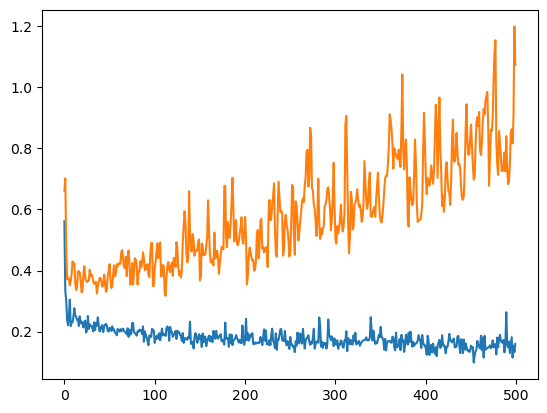

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

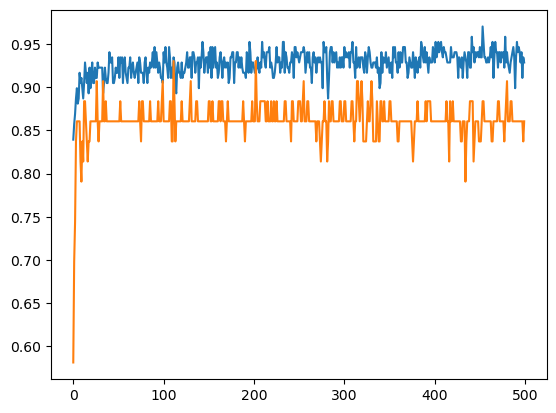

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])